# K-Nearest neighbours

Welcome to your next lab! You will build a k-nearest neighbours classifier.

You will implement this model in OOP way.

**You will learn to:**
- Build the general architecture of a learning algorithm with OOP in mind:
    - Helper functions
        - Calculating euclidian distance
        - Finding labels of k-nearest neighbours
    - Main Model Class
        - Training
        - Prediction 

## 1 - Packages ##

First, let's run the cell below to import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 2 - Overview of the Dataset  ##

**Problem Statement**: You are given a dataset  containing:
    - a training set of m_train examples
    - a test set of m_test examples
    - each example is of shape (number of features, 1)
    
    
Iris Plants Database
===========================

Notes
------
Data Set Characteristics:  

    :Number of Instances: 150 (50 in each of three classes)

    :Number of Attributes: 4 numeric, predictive attributes and the class
    
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica
        
    :Missing Attribute Values: None   
    
    :Class Distribution: 33.3% for each of 3 classes.
    
    :Missing Attribute Values: None

    :Creator: R.A. Fisher
    
    :Donor: Michael Marshall

This is a copy of UCI ML iris datasets.http://archive.ics.uci.edu/ml/datasets/Iris\ 

The famous Iris database, first used by Sir R.A Fisher.
This is perhaps the best known database to be found in the pattern recognition literature.  Fisher's paper is a classic in the field and is referenced frequently to this day.  (See Duda & Hart, for example.)  The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.  One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.
     
**References**

   - Fisher,R.A. "The use of multiple measurements in taxonomic problems" Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to Mathematical Statistics" (John Wiley, NY, 1950).
   - Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.(Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.  
   - Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System Structure and Classification Rule for Recognition in Partially Exposed Environments".  IEEE Transactions on Pattern Analysis and Machine Intelligence, Vol. PAMI-2, No. 1, 67-71.
   - Gates, G.W. (1972) "The Reduced Nearest Neighbor Rule". IEEE Transactions on Information Theory, May 1972, 431-433.
   - See also: 1988 MLC Proceedings, 54-64.  Cheeseman et al"s AUTOCLASS II conceptual clustering system finds 3 classes in the data.
   - many more! (see https://archive.ics.uci.edu/ml/datasets/iris)',


You will build a simple algorithm that can correctly classify training examples depending on your particular dataset.

<b>Let's get more familiar with the dataset. Load the data by running the following code.<b>

In [2]:
def load_data():
    from sklearn.model_selection import train_test_split
    from sklearn import datasets
    
    iris = datasets.load_iris()
    
    train_set_x, test_set_x, train_set_y, test_set_y = train_test_split(iris.data, iris.target, test_size=0.33, random_state=42)
    
    return train_set_x, test_set_x, train_set_y, test_set_y, iris

train_set_x, test_set_x, train_set_y, test_set_y, visualization_set = load_data()

Many software bugs in machine learning come from having matrix/vector dimensions that don't fit. If you can keep your matrix/vector dimensions straight you will go a long way toward eliminating many bugs. 

**Exercise:** Find the values for:
    - m_train (number of training examples)
    - m_test (number of test examples)
    
Remember that `train_set_x` is a numpy-array of shape (number of examples, number of features). For instance, you can access `m_train` by writing `train_set_x.shape[0]`.

In [3]:
### START CODE HERE ### (≈ 2 lines of code)
m_train = train_set_x.shape[0]
m_test = test_set_x.shape[0]
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))

print ("train_set_x shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 100
Number of testing examples: m_test = 50
train_set_x shape: (100, 4)
train_set_y shape: (100,)
test_set_x shape: (50, 4)
test_set_y shape: (50,)


**Expected Output for m_train, m_test**: 
<table style="width:15%">
  <tr>
    <td>**m_train**</td>
    <td> 100 </td> 
  </tr>
  
  <tr>
    <td>**m_test**</td>
    <td> 50 </td> 
  </tr>
  

  
</table>

### Data visualization

Let's print a histogram of the quantity to predict: class

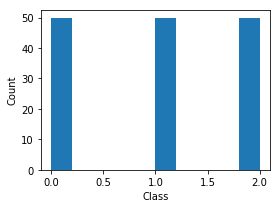

In [4]:
plt.figure(figsize=(4, 3))
plt.hist(visualization_set.target)
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()

And it is very useful to understand the join distribution for each feature


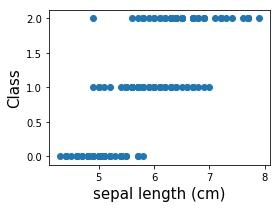

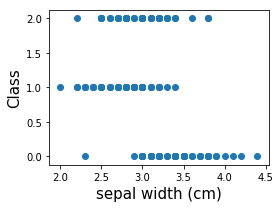

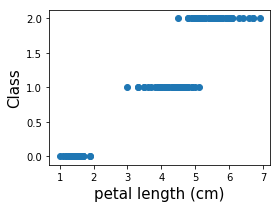

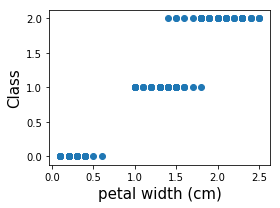

In [5]:
for index, feature_name in enumerate(visualization_set.feature_names):
    plt.figure(figsize=(4, 3))
    plt.scatter(visualization_set.data[:, index], visualization_set.target)
    plt.ylabel("Class", size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()

<font color='green'>
**What you need to remember:**

Common steps for pre-processing a new dataset are:
- Figure out the dimensions and shapes of the problem (m_train, m_test, ...)
- Reshape the datasets such that each example is now a vector of size (n, 1)
- "Standardize" the data

## 3 - General Architecture of the learning algorithm ##

The K-nearest neighbours algorithm essentially boils down to forming a majority vote between the K most similar instances to a given "unseen" observation. 

**Mathematical expression of the algorithm**:

Similarity is defined according to a distance metric between two data points. Let's use the Euclidean distance given by


$$d(x, {x}') = \sqrt{(x_{1} - {x}'_{1})^2 + ... + (x_{n} - {x}'_{n})^2} \tag{1}$$

More formally, given a positive integer K, an unseen observation x and a similarity metric d, KNN classifier performs the following two steps:

   - It runs through the whole dataset computing distance $d$ between each unseen point $x$ and each training observation. We'll take the K points in the training data that are closest to $x$ in the set of unseen points $\mathcal{A}$. 

   - Then it estimates the conditional probability for each class, that is the fraction of points in $\mathcal{A}$ with that given class label. (Note $I(x)$ is the indicator function which evaluates to 1 when the argument $x$ is true and 0 otherwise)
   
   $$P(y = j | X = x) = \frac{1}{K} \sum_{i \in \mathcal{A}} I(y^{(i)} = j)\tag{2}$$
   Finally, input x gets assigned to the class with the largest probability.
   
**Key steps**:
In this exercise, you will carry out the following steps: 
    - Calculate euclidian distances
    - Find k-nearest neighbours' labels
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude

### 3.1 - Helper utilities###


In this exercise, you will lear more about custom implemenation:

- Calculating Euclidian Distances
- Finding k-nearest neghbours' labesls


Let's get more detailed look at these functions:

Implement calculation of the Euclidean distance in the cell below. You have to calculate distances from all unknown points to all known.

In [9]:
# euclidian distance

def euclidian_dist(x_known,x_unknown):
    """
    This function calculates euclidian distance between each pairs of known and unknown points
    
    Argument:
    x_known -- array of training data with shape (num_examples, num_features)
    x_unknown -- array of test data with shape (num_examples, num_features)
    
    Returns:
    dists -- array of euclidian distances between each pairs of known and unknown points, 
    initialized as np.array of zeros with shape of (num_pred,num_data)
    
    """
    num_pred = x_unknown.shape[0]
    num_data = x_known.shape[0]
    
    
    ### START CODE HERE ### (≈ 1 line of code)
    dists = np.zeros((num_pred, num_data))
    ### END CODE HERE ###

    for i in range(num_pred):
        for j in range(num_data):
            # calculate euclidian distance here
            ### START CODE HERE ### (≈ 1-2 lines of code)
            dists[i,j] = np.sqrt(np.sum((x_unknown[i] - x_known[j]) ** 2))
            ### END CODE HERE ###
            
    return dists

In [10]:
x1 = np.array([[1,1], [3,3], [4, 4]])
x2 = np.array([[2,2],[3,3], [5, 5]])
d = euclidian_dist(x1, x2)
print(d)

[[1.41421356 1.41421356 2.82842712]
 [2.82842712 0.         1.41421356]
 [5.65685425 2.82842712 1.41421356]]


**Expected Output**: 
<table style="width:25%">
  <tr>
    <td> [[1.41421356 1.41421356 2.82842712] </td> 
  </tr>
  <tr>
    <td>[2.82842712 0.         1.41421356] </td> 
  </tr>
  <tr>
    <td> [5.65685425 2.82842712 1.41421356]] </td> 
  </tr>

  
</table>

Implement function that returns labels of k-nearest neighbours to each sample for unknown data. 

In [22]:
# k nearest labels

def k_nearest_labels(dists, y_known, k):
    """
    This function returns labels of k-nearest neighbours to each sample for unknown data.
    
    Argument:
    dists -- array of euclidian distances between each pairs of known and unknown points
    with shape (num_test_examples, num_train_examples)
    y_known -- array of train data labels
    k -- scalar, which means number of nearest neighbours
    
    Returns:
    knearest_labels -- array with shape (num_samples, k) which contains labels of k nearest neighbours for each sample 
    
    """
        
    num_pred = dists.shape[0]
    n_nearest = []
    
    for j in range(num_pred):
        dst = dists[j]
        
        # count k closest points 
        ### START CODE HERE ### (≈ 1-2 lines of code)
        closest_y = y_known[np.argsort(dst)][:k]
        ### END CODE HERE ###
        
        n_nearest.append(closest_y)
    return np.asarray(n_nearest) 

In [23]:
y = np.array([2, 3, 1])
knl = k_nearest_labels(d, y, 2)
print(knl)

[[2 3]
 [3 1]
 [1 3]]


**Expected Output**:
    
<table style="width:15%">
  <tr>
    <td>[[2 3] </td> 
  </tr>
  <tr>
    <td>[3 1] </td> 
  </tr>
  <tr>
    <td>[1 3]] </td> 
    </tr>

</table>

### 3.2 Model

In [56]:
# GRADED CLASS: K-nearest Neighbours

class KNearest_Neighbours(object):
    """
    Parameters:
    -----------
    k: int
        The number of nearest neighbours
    """
    def __init__(self, k):
        
        self.k = k
        self.test_set_x = None
        self.train_set_x = None
        self.train_set_y = None

        
    def fit(self, train_set_x, train_set_y):
        
        ### START CODE HERE ### 
        
        self.train_set_x = train_set_x
        self.train_set_y = train_set_y
        
        ### END CODE HERE ###
        
    def predict(self, test_set_x):
        
        # Returns list of predicted labels for test set; type(prediction) -> list, len(prediction) = len(test_set_y)
        ### START CODE HERE ### (≈ 1 line of code)
        return [max(set(l), key = list(l).count) for l in k_nearest_labels(euclidian_dist(self.train_set_x, test_set_x), self.train_set_y, self.k)]
        
        ### END CODE HERE ###


## 4 - Training

First of all, we should define a number of nearest neighbours (k).

In [57]:
k = 4

Now we can initialize our model:

In [58]:
model = KNearest_Neighbours(k)

Let's train our model:

In [59]:
model.fit(train_set_x, train_set_y)

## 5 - Making predictions

In [60]:
y_predictions = model.predict(test_set_x)

Let's calculate accuracy (accuracy of model must be > 0.95):

In [61]:
actual = list(test_set_y)
accuracy = (y_predictions == test_set_y).mean()
print(accuracy)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]
[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2, 1, 2]
0.98


Let's check the difference between real and predicted labels:

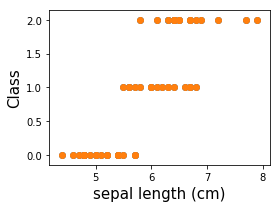

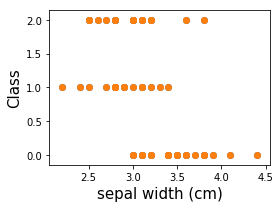

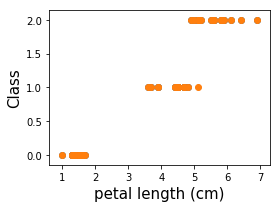

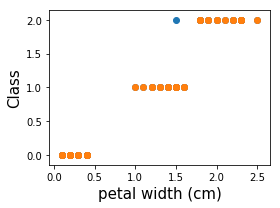

In [62]:
for index, feature_name in enumerate(visualization_set.feature_names):
    plt.figure(figsize=(4, 3))
    plt.scatter(test_set_x[:, index], test_set_y) # real labels
    plt.scatter(test_set_x[:, index], y_predictions) # predicted labels
    plt.ylabel("Class", size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()

## 6 - Conclusion
As we can see, our model fits well to the data.

#### What's next:
1. Try experimenting with the `k` to see how this affects the model you have built.
2. Compare the results you have obtained with the `sklearn.neighbors.KNeighborsClassifier` model.
3. Try this model in the wild! Select your favorite dataset [here](https://www.kaggle.com/datasets?sortBy=hottest&group=public&page=1&pageSize=20&size=small&filetype=all&license=all&tagids=13303) and play with it.